In [1]:
using LinearAlgebra, Plots, JuMP, HiGHS

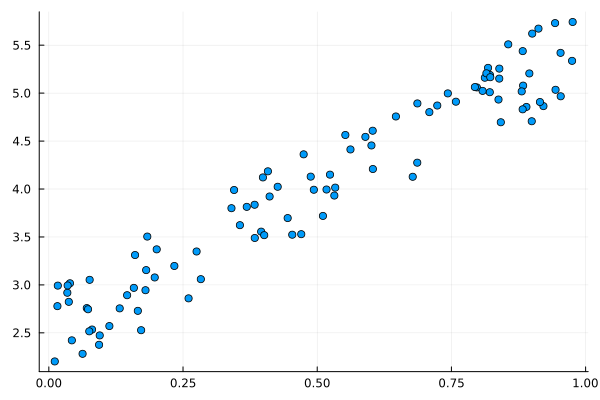

In [2]:
X = rand(100)
Y = 2 .+ 3 .* X .+ rand(100)
N = X |> length
C = 10
scatter(X, Y, legend=false)

In [25]:
model = Model(HiGHS.Optimizer)
@variables(model, begin
    a[1:N] >= 0
    ap[1:N] >= 0
end)
@constraint(model, c1, a <= C)
@constraint(model, c2, ap <= C)
@constraint(model, c3, sum(a .- ap) == 0)
@objective(model, Max, begin
    S = 0
    for i in 1:N
        for j in 1:N
            S += 1/2 * (a[i] - ap[i]) * (a[j] - ap[j]) * (X[i] * X[j])
        end
    end
    S - sum(a .- ap) - sum(Y .* (a .- ap))
    return S
end)
print("end")

ErrorException: Operation `sub_mul` between `Vector{VariableRef}` and `Int64` is not allowed. You should use broadcast.

In [24]:
optimize!(model)

Running HiGHS 1.3.0 [date: 1970-01-01, git hash: e5004072b-dirty]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
1 rows, 200 cols, 200 nonzeros
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-201); columns 0(-200); elements 0(-400) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  0.0000000000e+00
HiGHS run time      :          0.00


In [22]:
value.(a)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0